# 12. Local features + Homography – localizing objects

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = 'data'

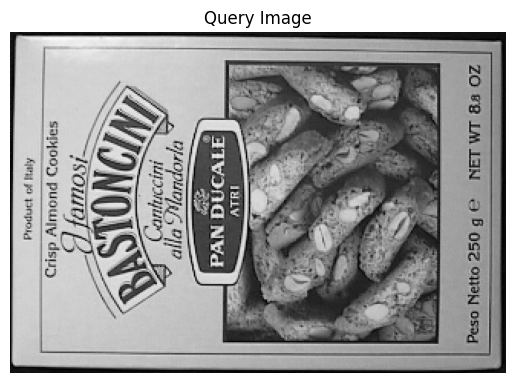

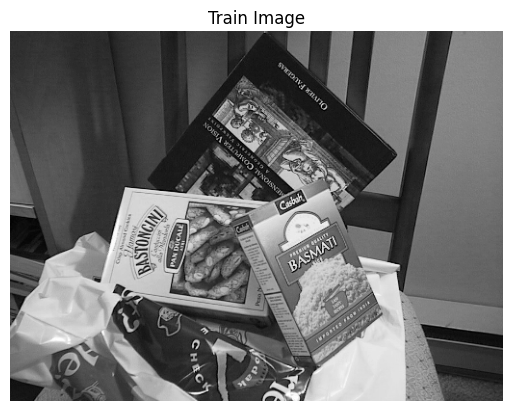

In [3]:
query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

plt.imshow(query, cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

plt.imshow(train, cmap='gray')
plt.title('Train Image')
plt.axis('off')
plt.show()

plt.show()

Develop a program that tries to detect a given object in an image, delineating the countour of the object in the image
(figure 4). Use one of the methods used in the previous exercises to extract and match keypoints, and the functions
cv::findHomography(), to find the transform between matched keypoints, and cv::perspectiveTransform(), to
map the points of the contour of the object to the image (note: in the case of figure 4, it is enough to map the 4
corners of the object, then draw the lines that connect the mapped corners).

In [4]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(query, None)
kp2, des2 = orb.detectAndCompute(train, None)

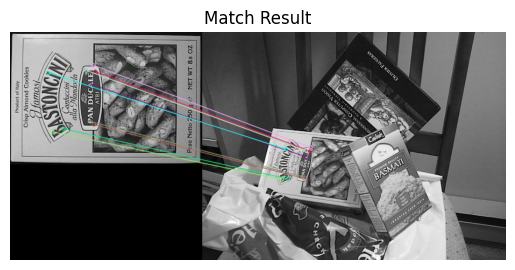

In [8]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = matcher.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
match_output = cv2.drawMatches(query, kp1, train, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_output)
plt.title('Match Result')
plt.axis('off')
plt.show()

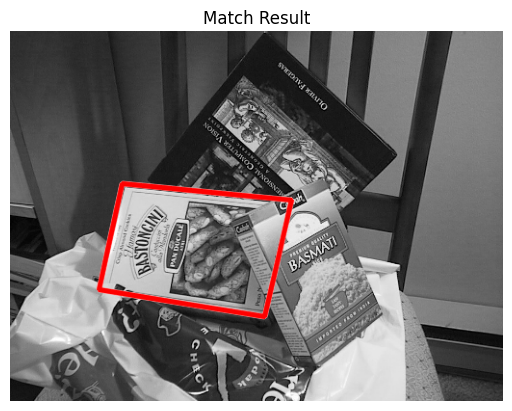

In [11]:
srcPoints = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dstPoints = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, _ = cv2.findHomography(srcPoints, dstPoints, cv2.RANSAC, 5.0)

# Draw the bounding box
h, w = query.shape
pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, H)

train = cv2.polylines(train, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

plt.imshow(train, cmap='gray')
plt.title('Match Result')
plt.axis('off')
plt.show()